In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv', usecols = ['Age', 'Fare', 'Survived'])

In [3]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [4]:
x = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

C:\Users\Santosh\AppData\Local\Temp\ipykernel_11108\817012221.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


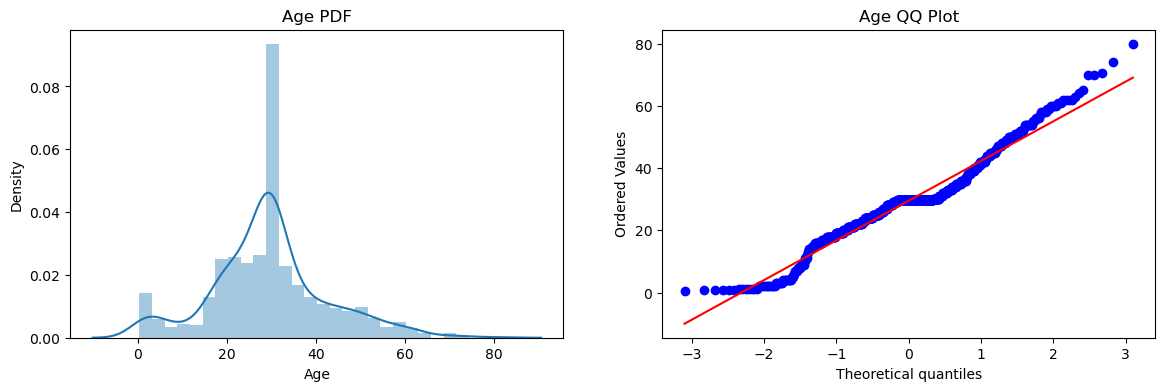

In [11]:
plt.figure(figsize = (14, 4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train['Age'], dist = 'norm', plot = plt)
plt.title("Age QQ Plot")

plt.show()

C:\Users\Santosh\AppData\Local\Temp\ipykernel_11108\3510474076.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


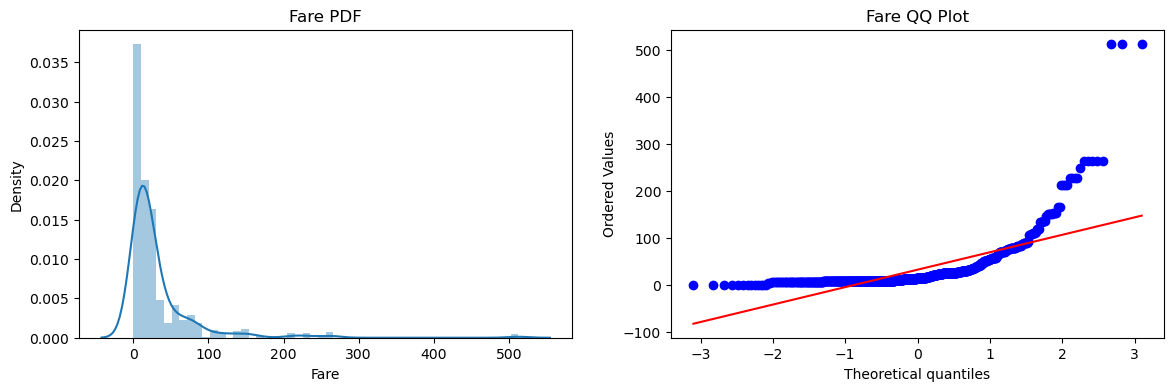

In [12]:
plt.figure(figsize = (14, 4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(X_train['Fare'], dist = 'norm', plot = plt)
plt.title("Fare QQ Plot")

plt.show()

In [13]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [15]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print(f"Accuracy RL {accuracy_score(y_test, y_pred)}")
print(f"Accuracy DTC {accuracy_score(y_test, y_pred1)}")

Accuracy RL 0.6480446927374302
Accuracy DTC 0.6536312849162011


In [17]:
# using log transformer from function transformer class
trf = FunctionTransformer(func = np.log1p)

In [21]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [22]:
# after the log transform
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print(f"Accuracy RL {accuracy_score(y_test, y_pred)}")
print(f"Accuracy DTC {accuracy_score(y_test, y_pred1)}")

Accuracy RL 0.6815642458100558
Accuracy DTC 0.6703910614525139


In [24]:
X_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print(f"LR {np.mean(cross_val_score(clf, X_transformed, y, scoring = 'accuracy', cv = 10))}")
print(f"LR {np.mean(cross_val_score(clf2, X_transformed, y, scoring = 'accuracy', cv = 10))}")

LR 0.678027465667915
LR 0.6532584269662922


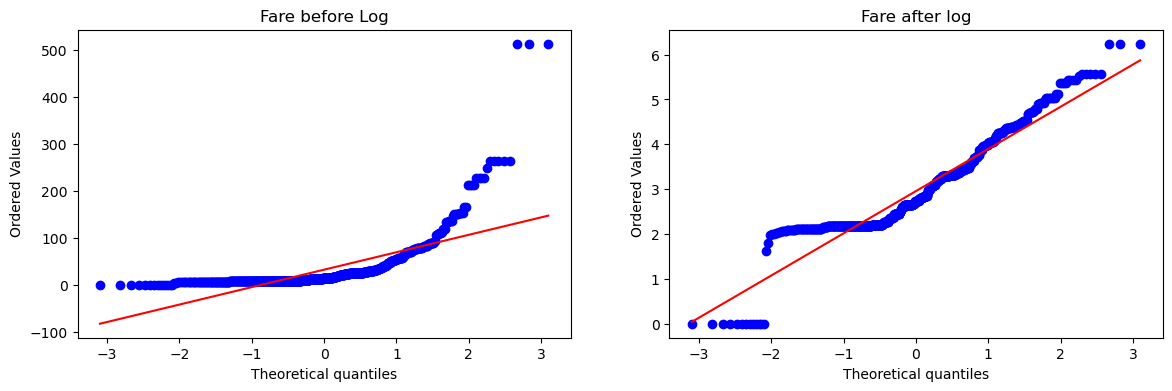

In [27]:
plt.figure(figsize = (14, 4))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist = 'norm', plot = plt)
plt.title("Fare before Log")

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist = 'norm', plot = plt)
plt.title("Fare after log")

plt.show()

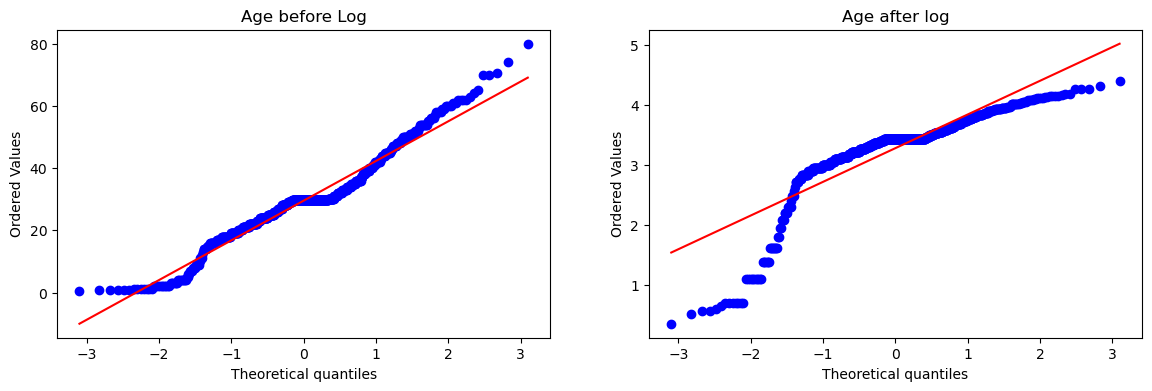

In [28]:
plt.figure(figsize = (14, 4))
plt.subplot(121)
stats.probplot(X_train['Age'], dist = 'norm', plot = plt)
plt.title("Age before Log")

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist = 'norm', plot = plt)
plt.title("Age after log")

plt.show()

In [32]:
# using log transform only for fare
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder = 'passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [33]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print(f"Accuracy LR {accuracy_score(y_test, y_pred)}")
print(f"Accuracy DTC {accuracy_score(y_test, y_pred2)}")

Accuracy LR 0.6703910614525139
Accuracy DTC 0.6536312849162011


In [34]:
X_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print(f"LR {np.mean(cross_val_score(clf, X_transformed2, y, scoring = 'accuracy', cv = 10))}")
print(f"LR {np.mean(cross_val_score(clf2, X_transformed2, y, scoring = 'accuracy', cv = 10))}")

LR 0.6712609238451936
LR 0.6577403245942571


In [37]:
def apply_transform(transform):
    X = df.iloc[:, 1: 3]
    Y = df.iloc[:, 0]
    
    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder = 'passthrough')
    
    X_transformed = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print(f"Accuracy LR: {np.mean(cross_val_score(clf, X_transformed, Y, scoring = 'accuracy', cv = 10))}")
    
    plt.figure(figsize = (14, 4))
    plt.subplot(121)
    stats.probplot(X['Fare'], dist = 'norm', plot = plt)
    plt.title("Fare before transform")

    plt.subplot(122)
    stats.probplot(X_transformed[:, 0], dist = 'norm', plot = plt)
    plt.title("Fare after transform")

    plt.show()

Accuracy LR: 0.6589013732833957


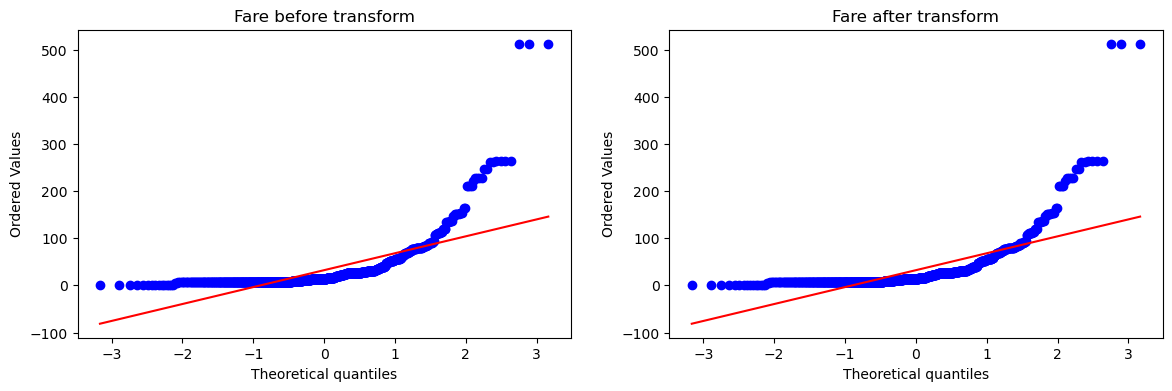

In [39]:
apply_transform(lambda x: x) # without using any transformation

Accuracy LR: 0.6431335830212235


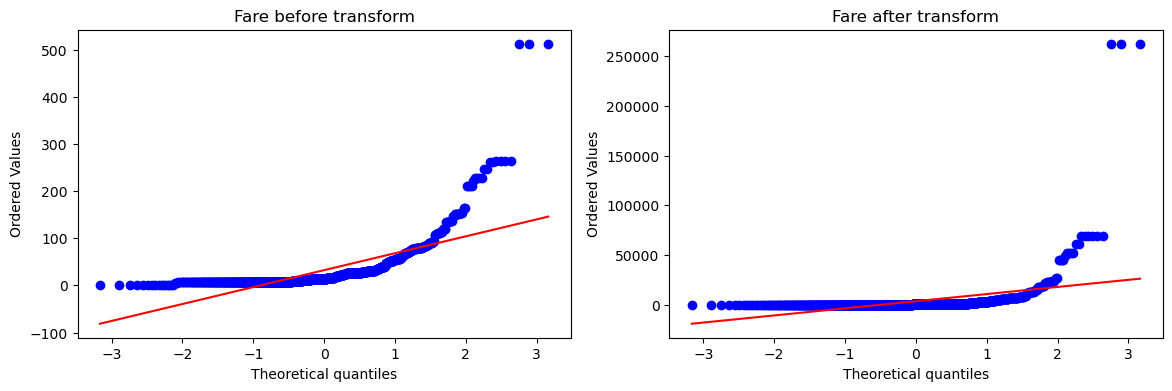

In [40]:
# square transformation
apply_transform(lambda x: x**2)

Accuracy LR: 0.6589013732833957


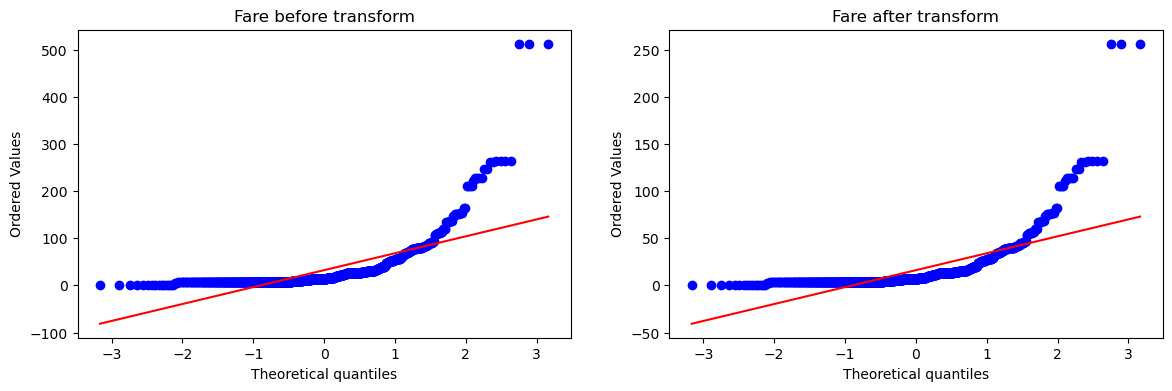

In [42]:
# square root transform
apply_transform(lambda x: x **1/2)

Accuracy LR: 0.61729088639201


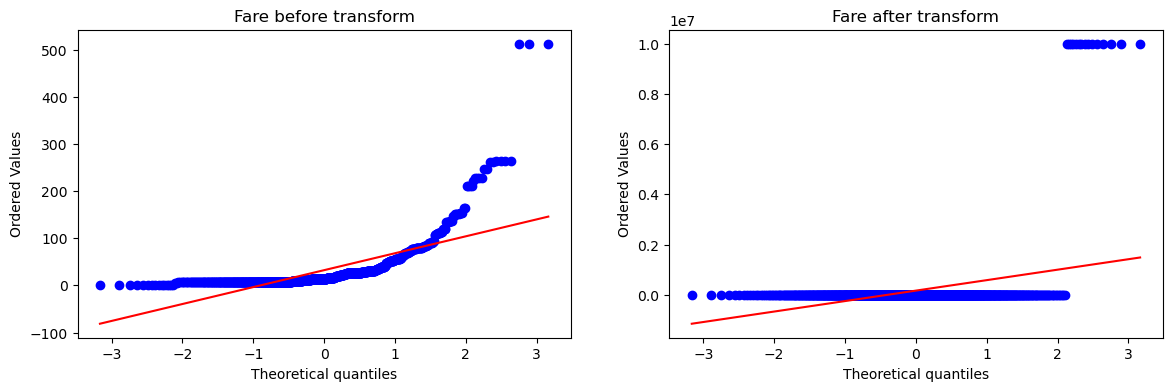

In [44]:
# reciprocal transform
apply_transform(lambda x: 1/(x+0.0000001))